In [1]:
!nvidia-smi

Sun Jun  1 11:10:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
#Step 01
# Install the Ultralytics Package
#!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 138.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vvnltDQnN21B7ClLPQN4")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:01<00:00, 6165.31it/s]


In [7]:
dataset.location

'/content/PPE_Detection-1'

In [8]:
# Step # 04
# Train YOLO11 Model on a Custom Dataset
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=20 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 111MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

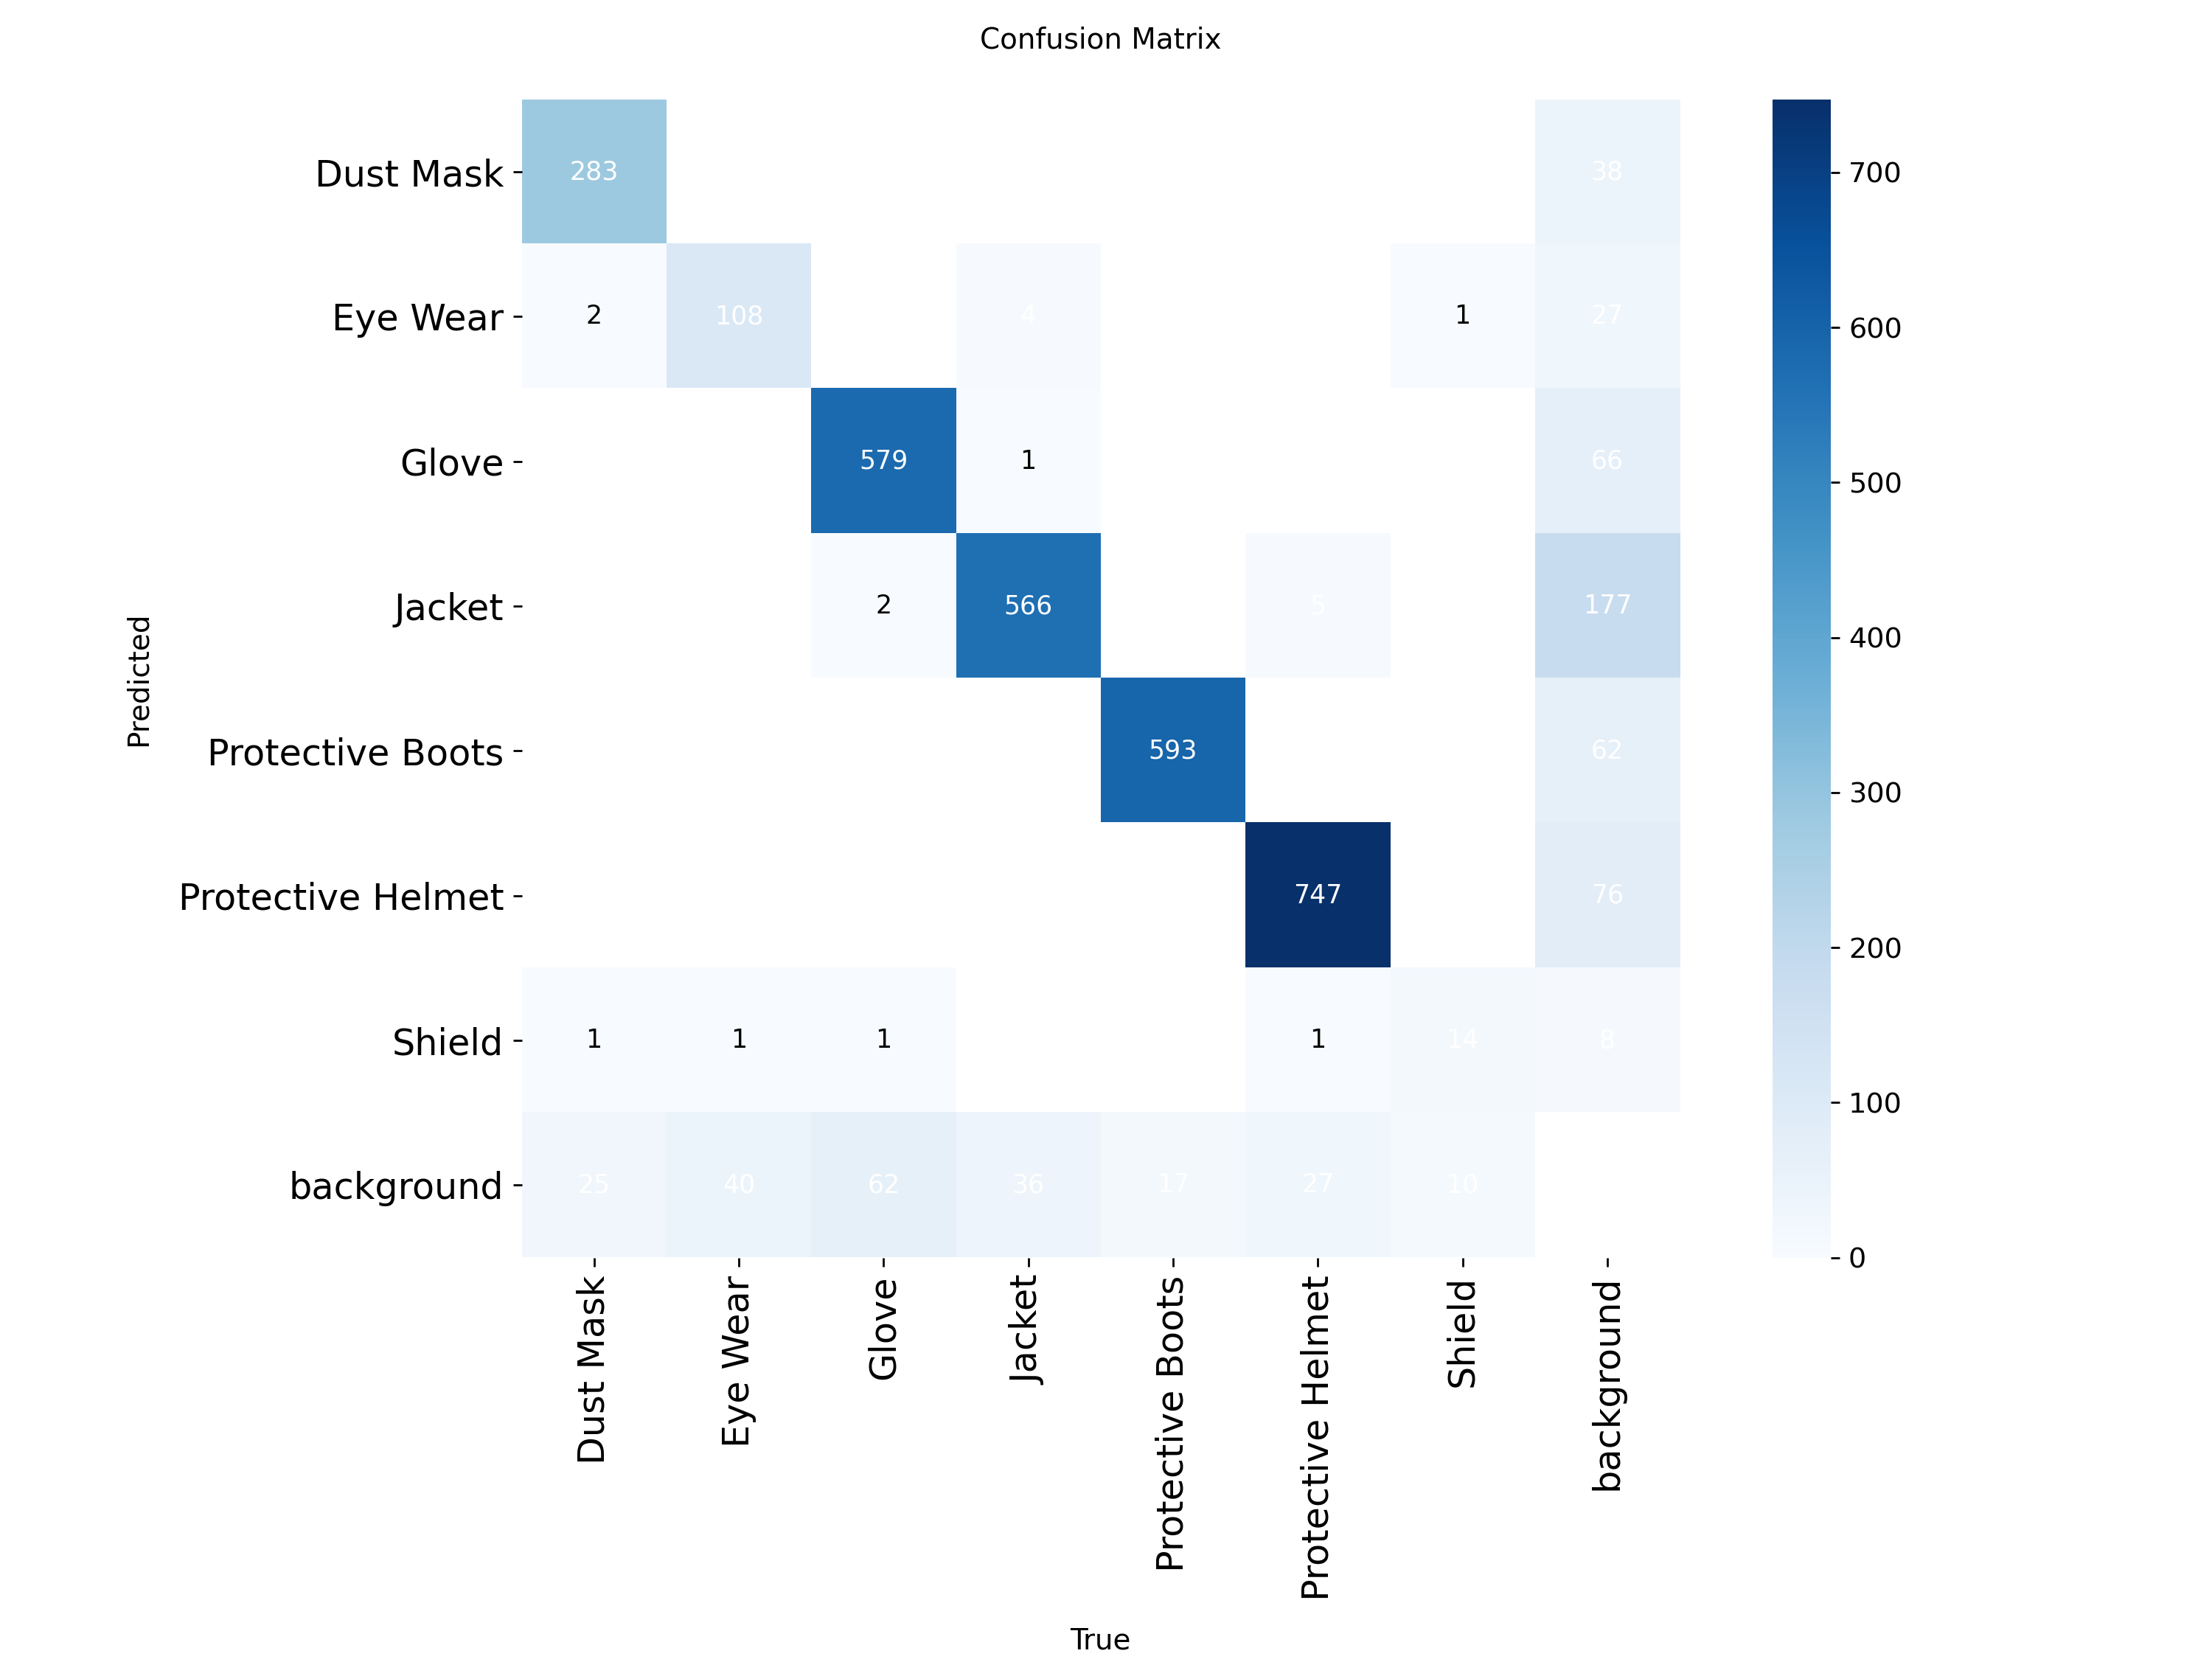

In [9]:
# Step # 05
# Examine Training Results
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

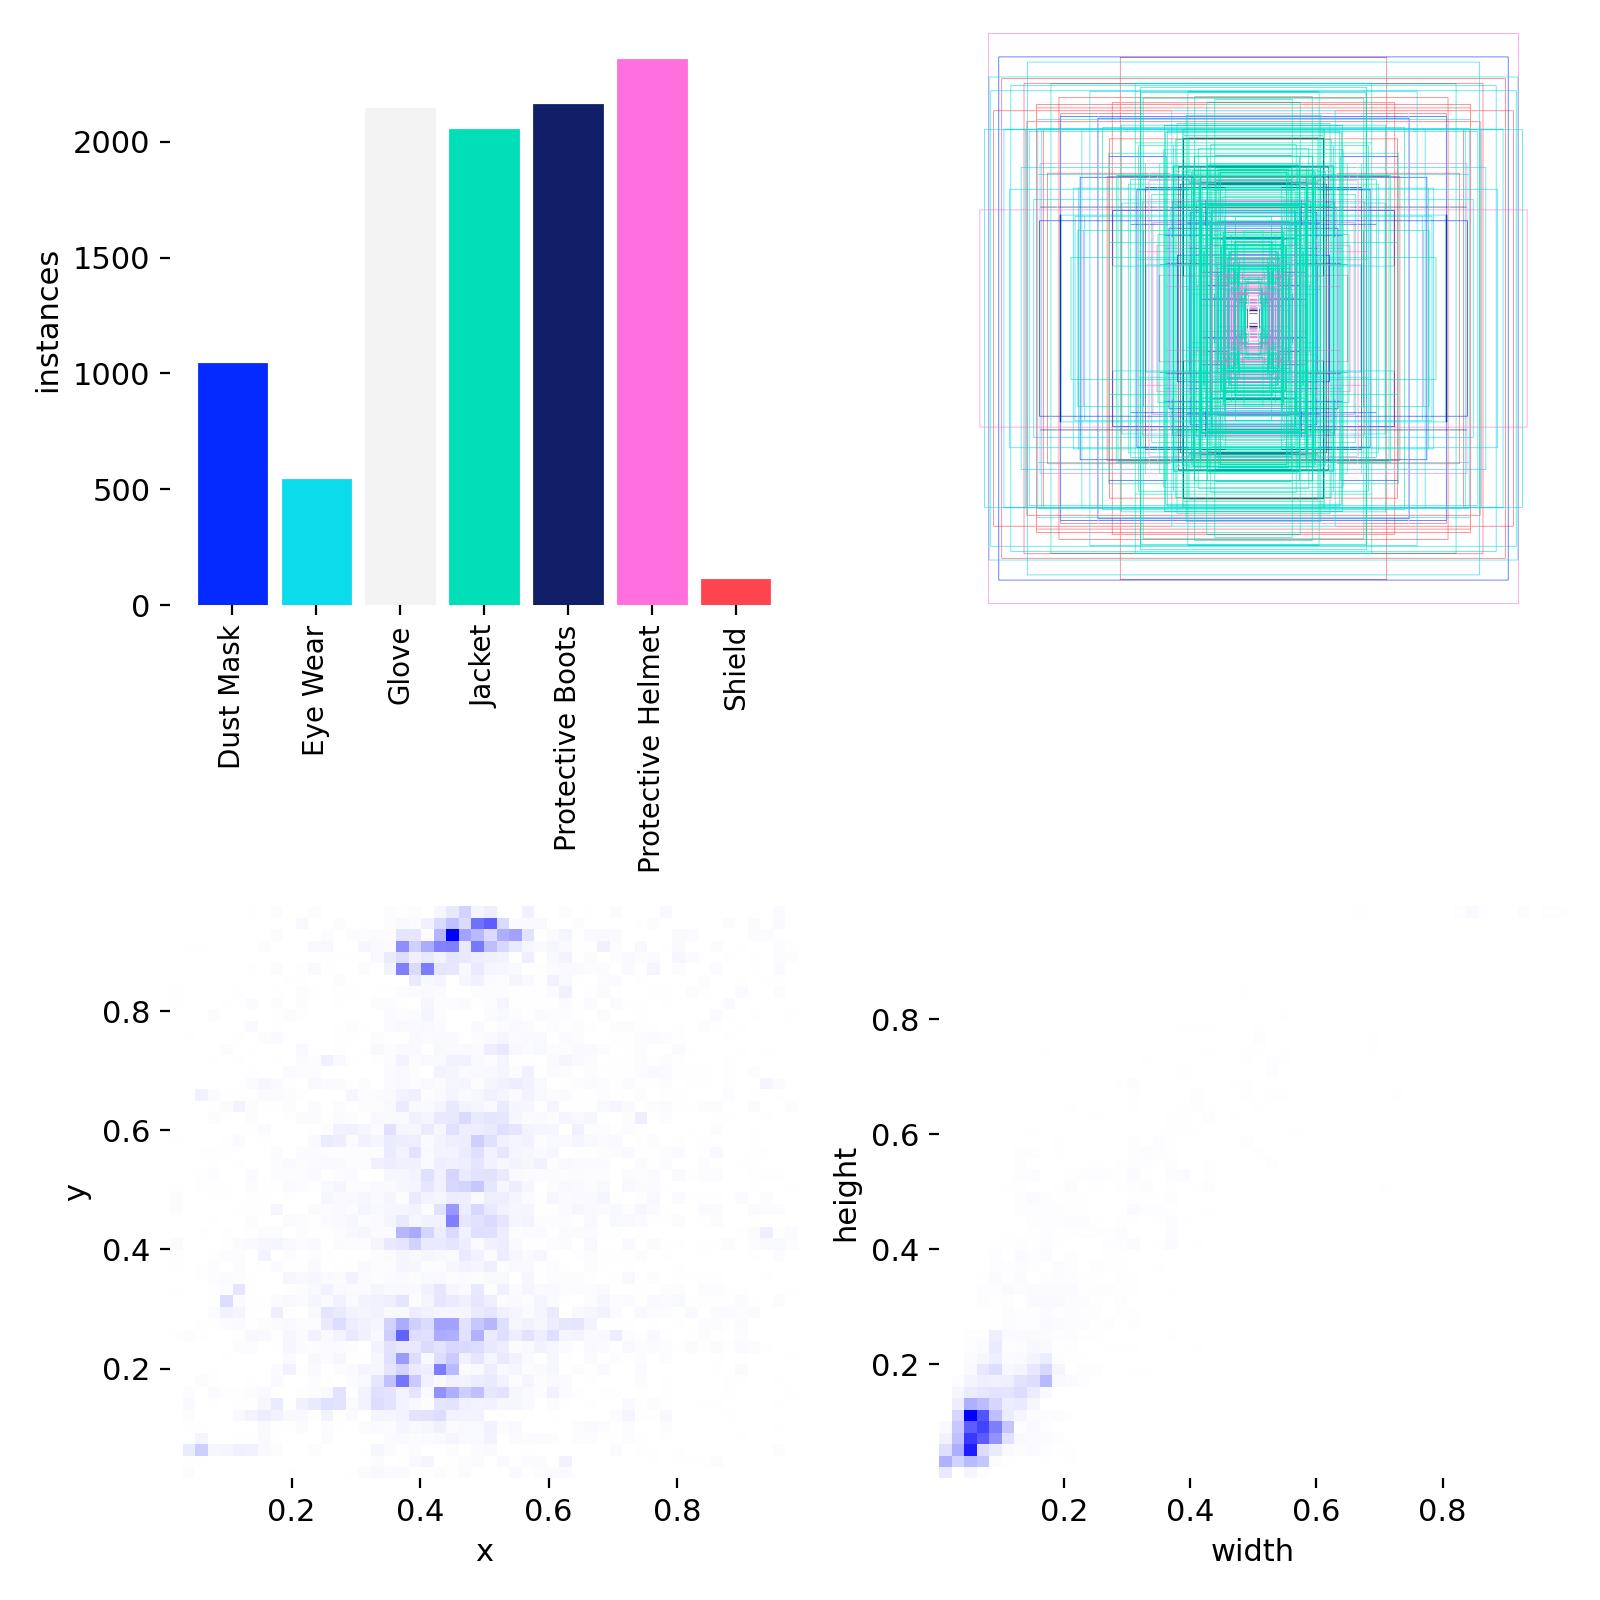

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

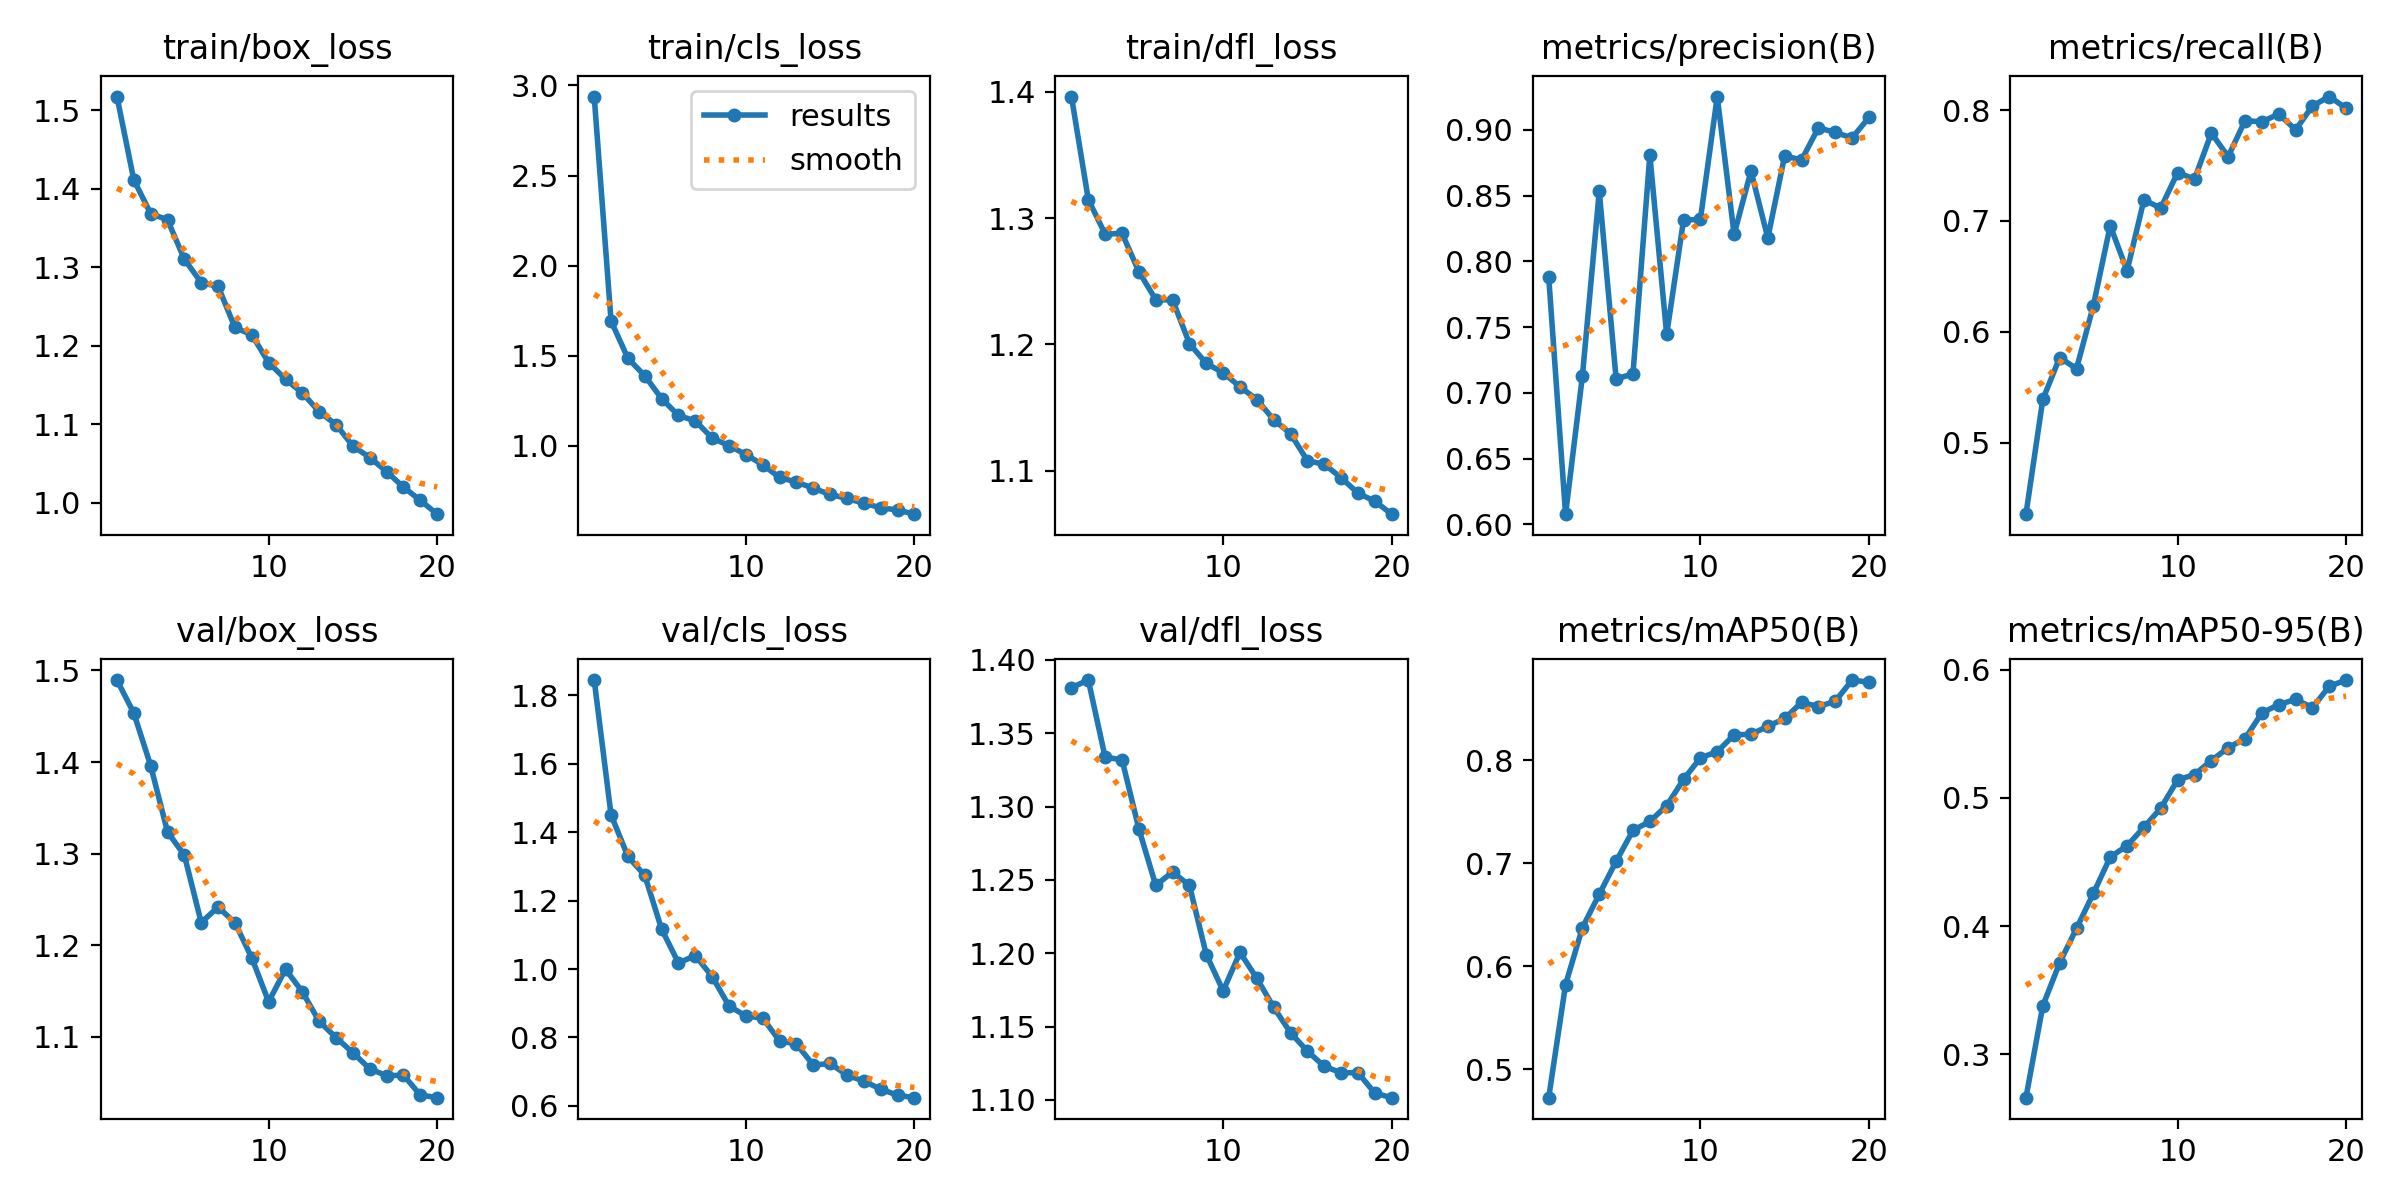

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

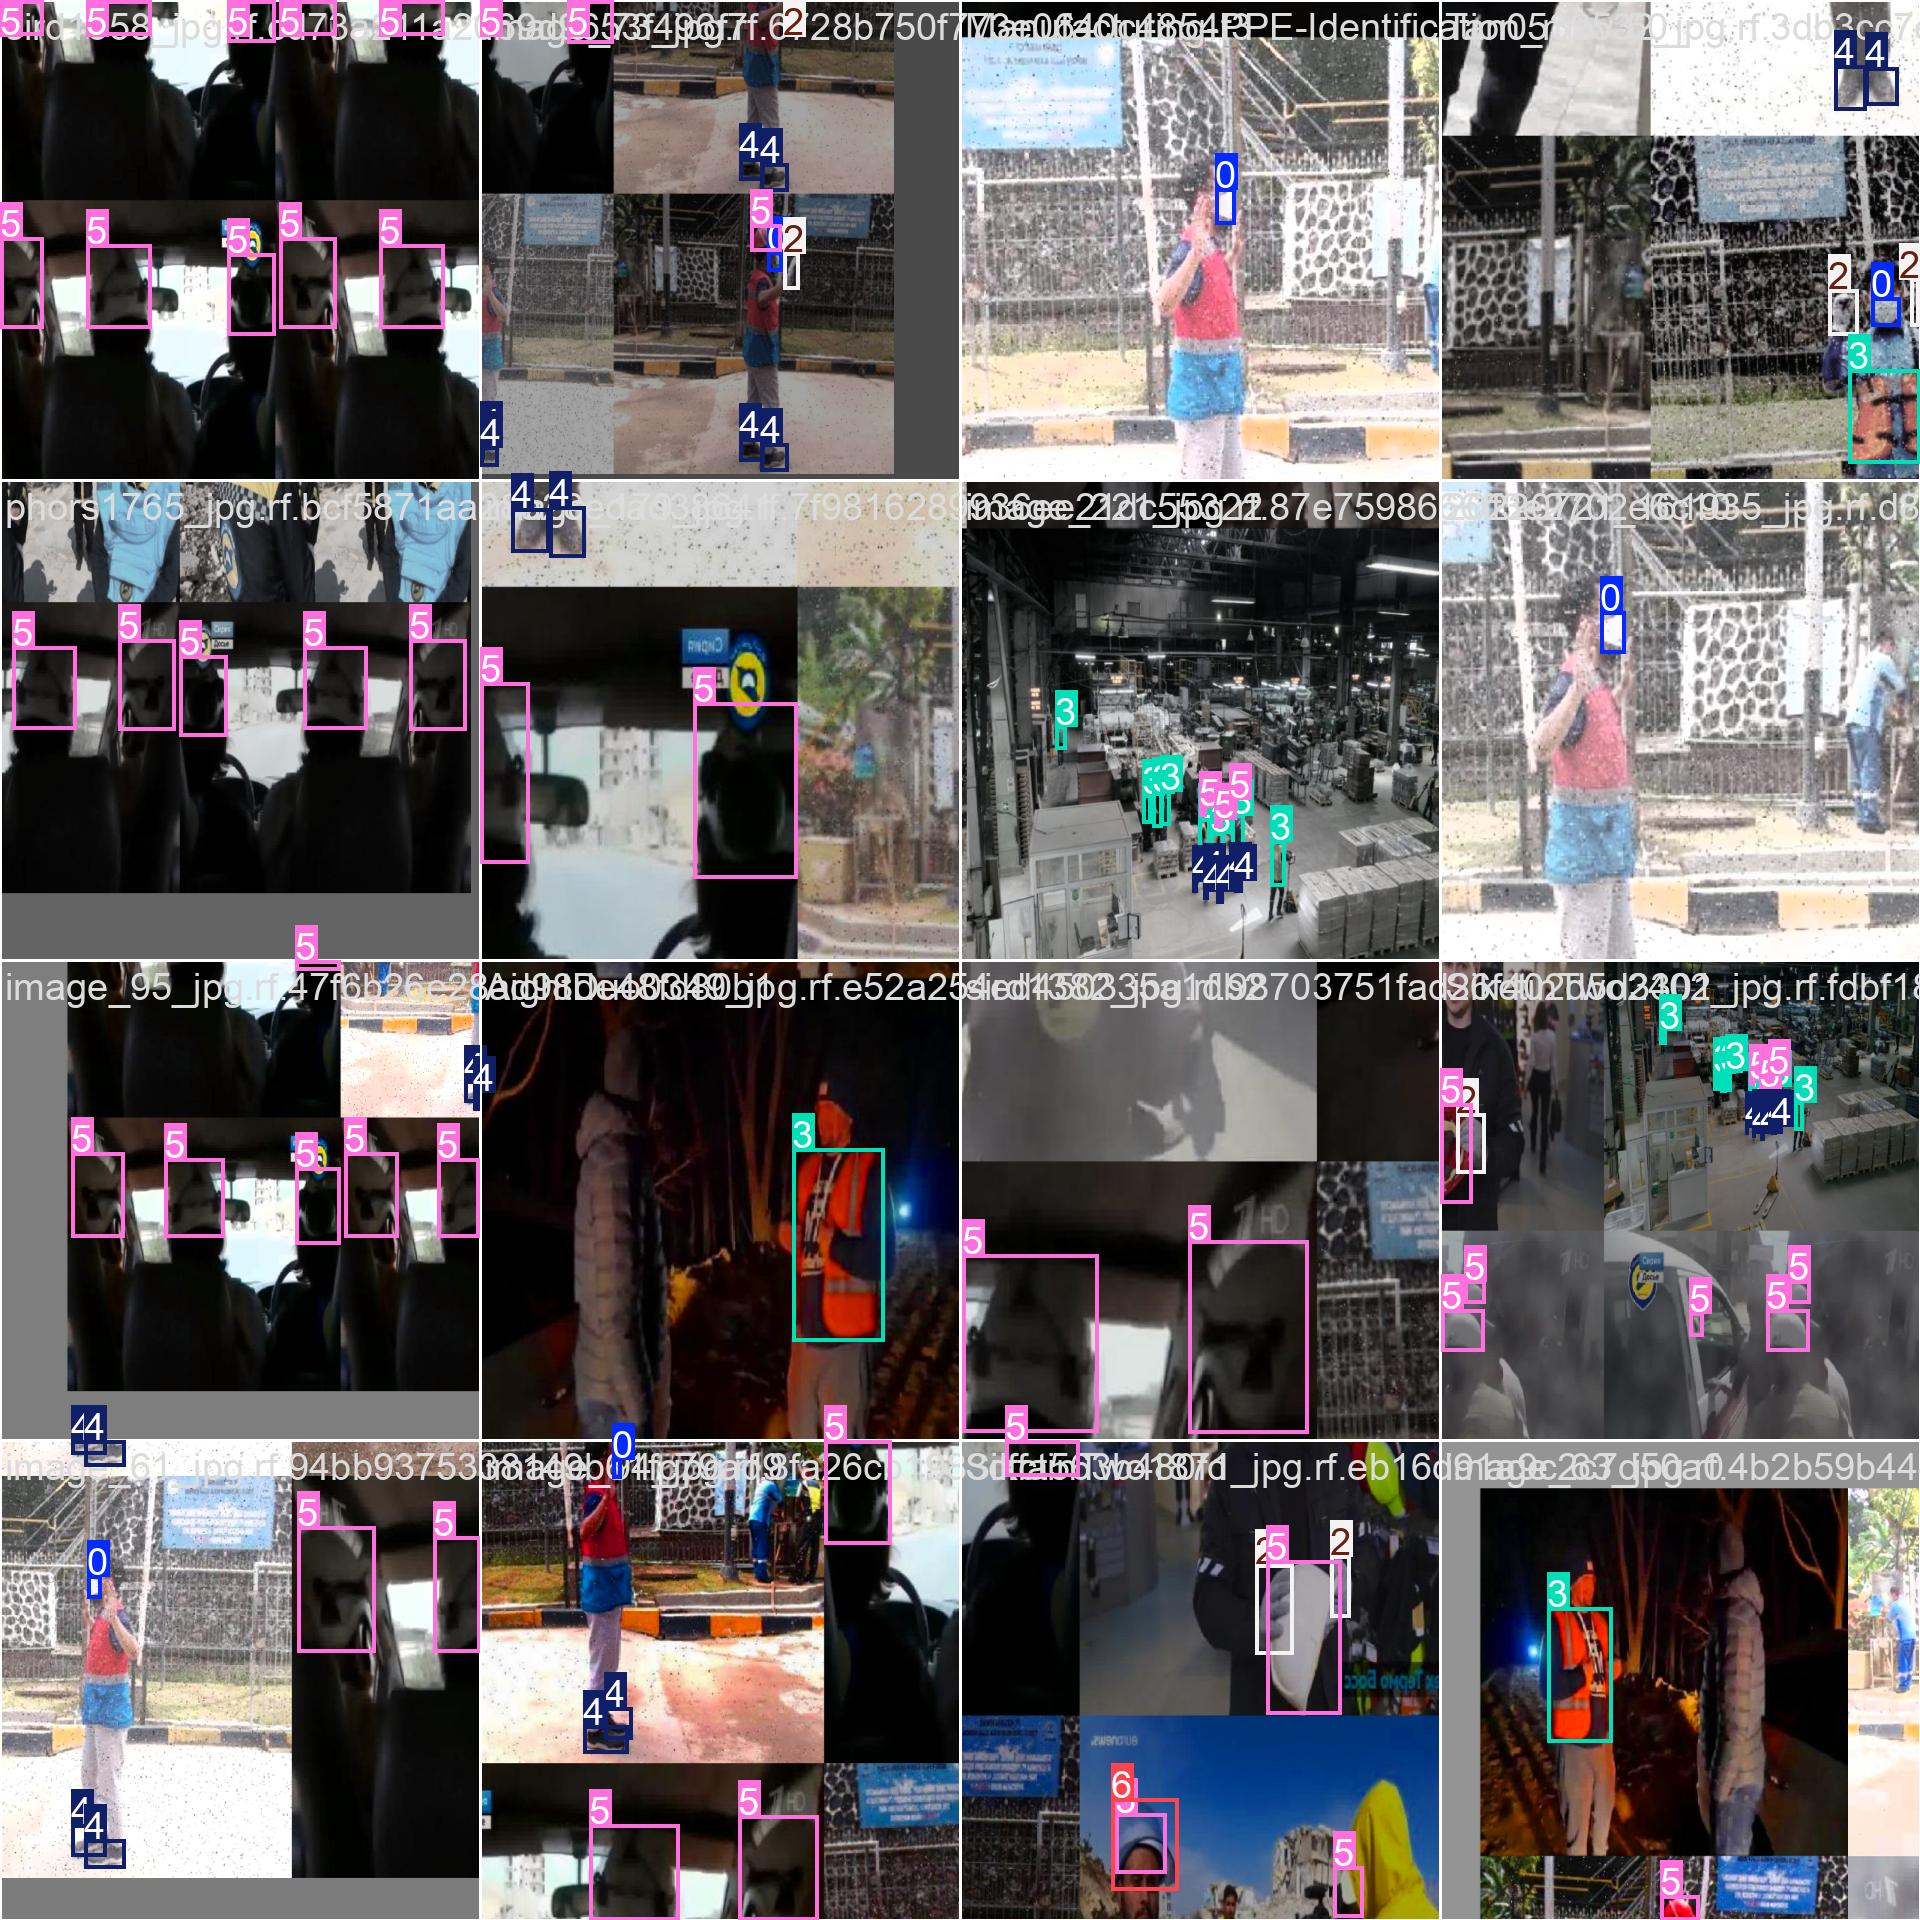

In [12]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

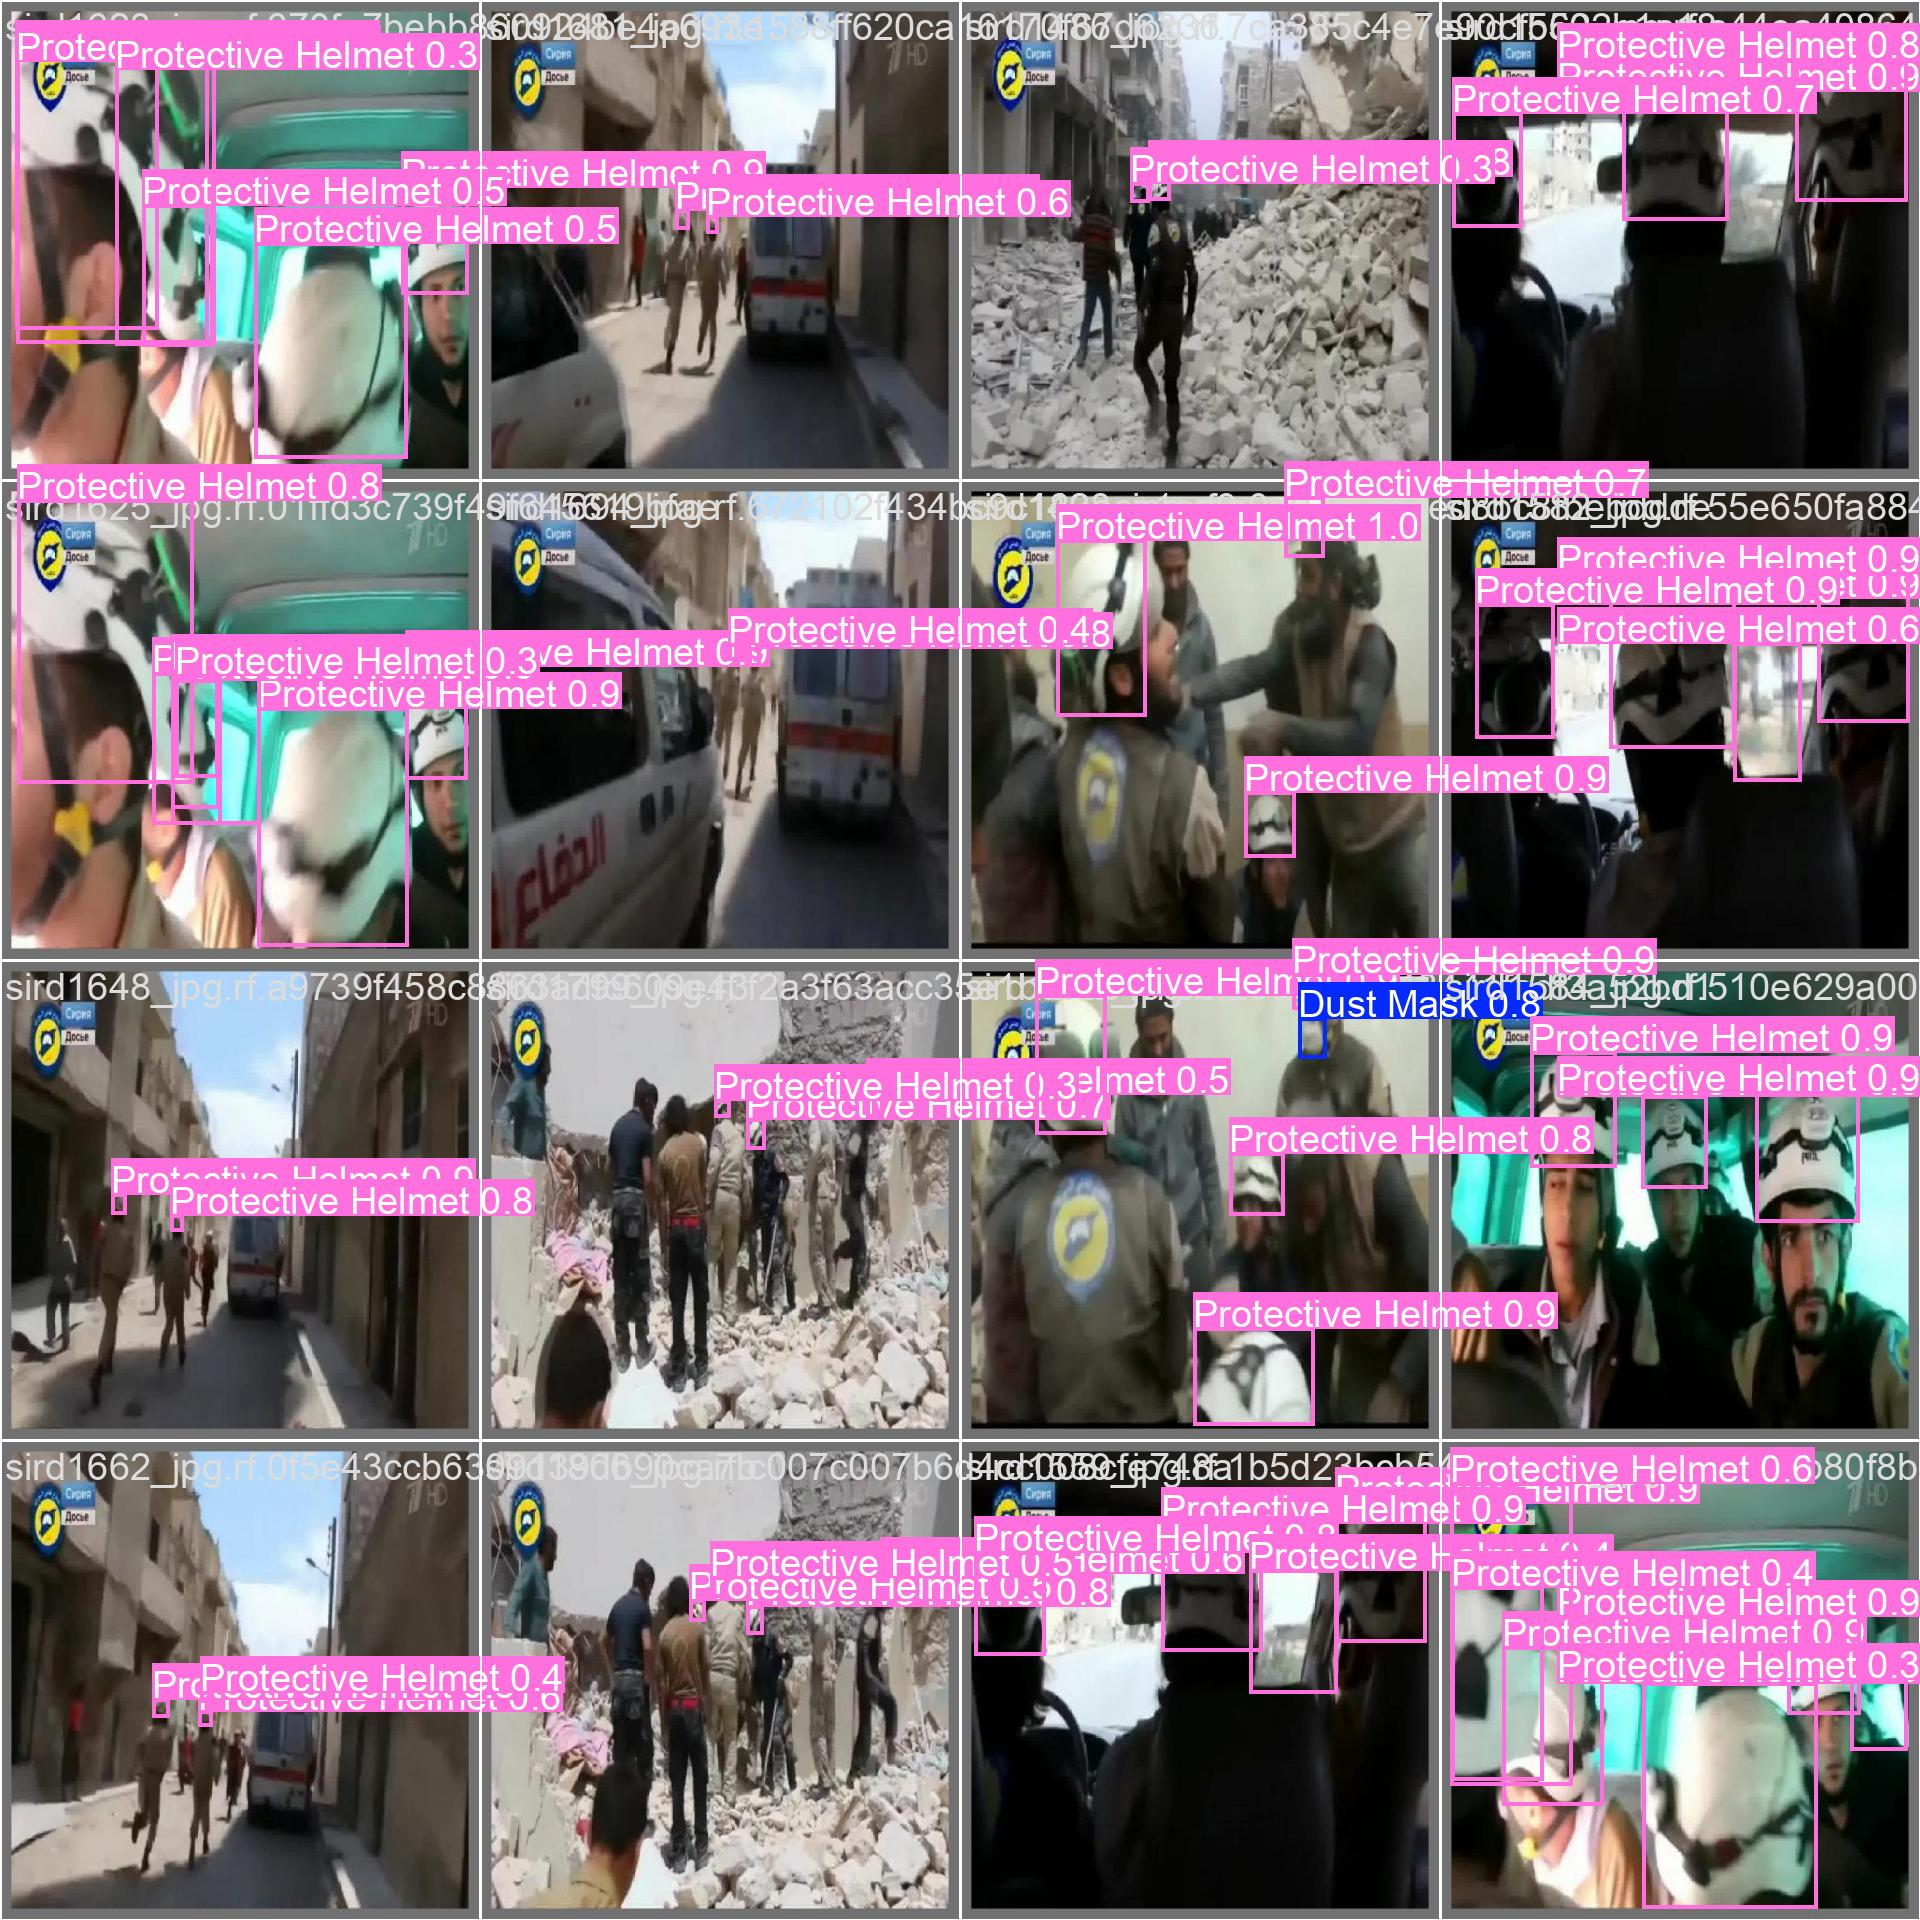

In [13]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

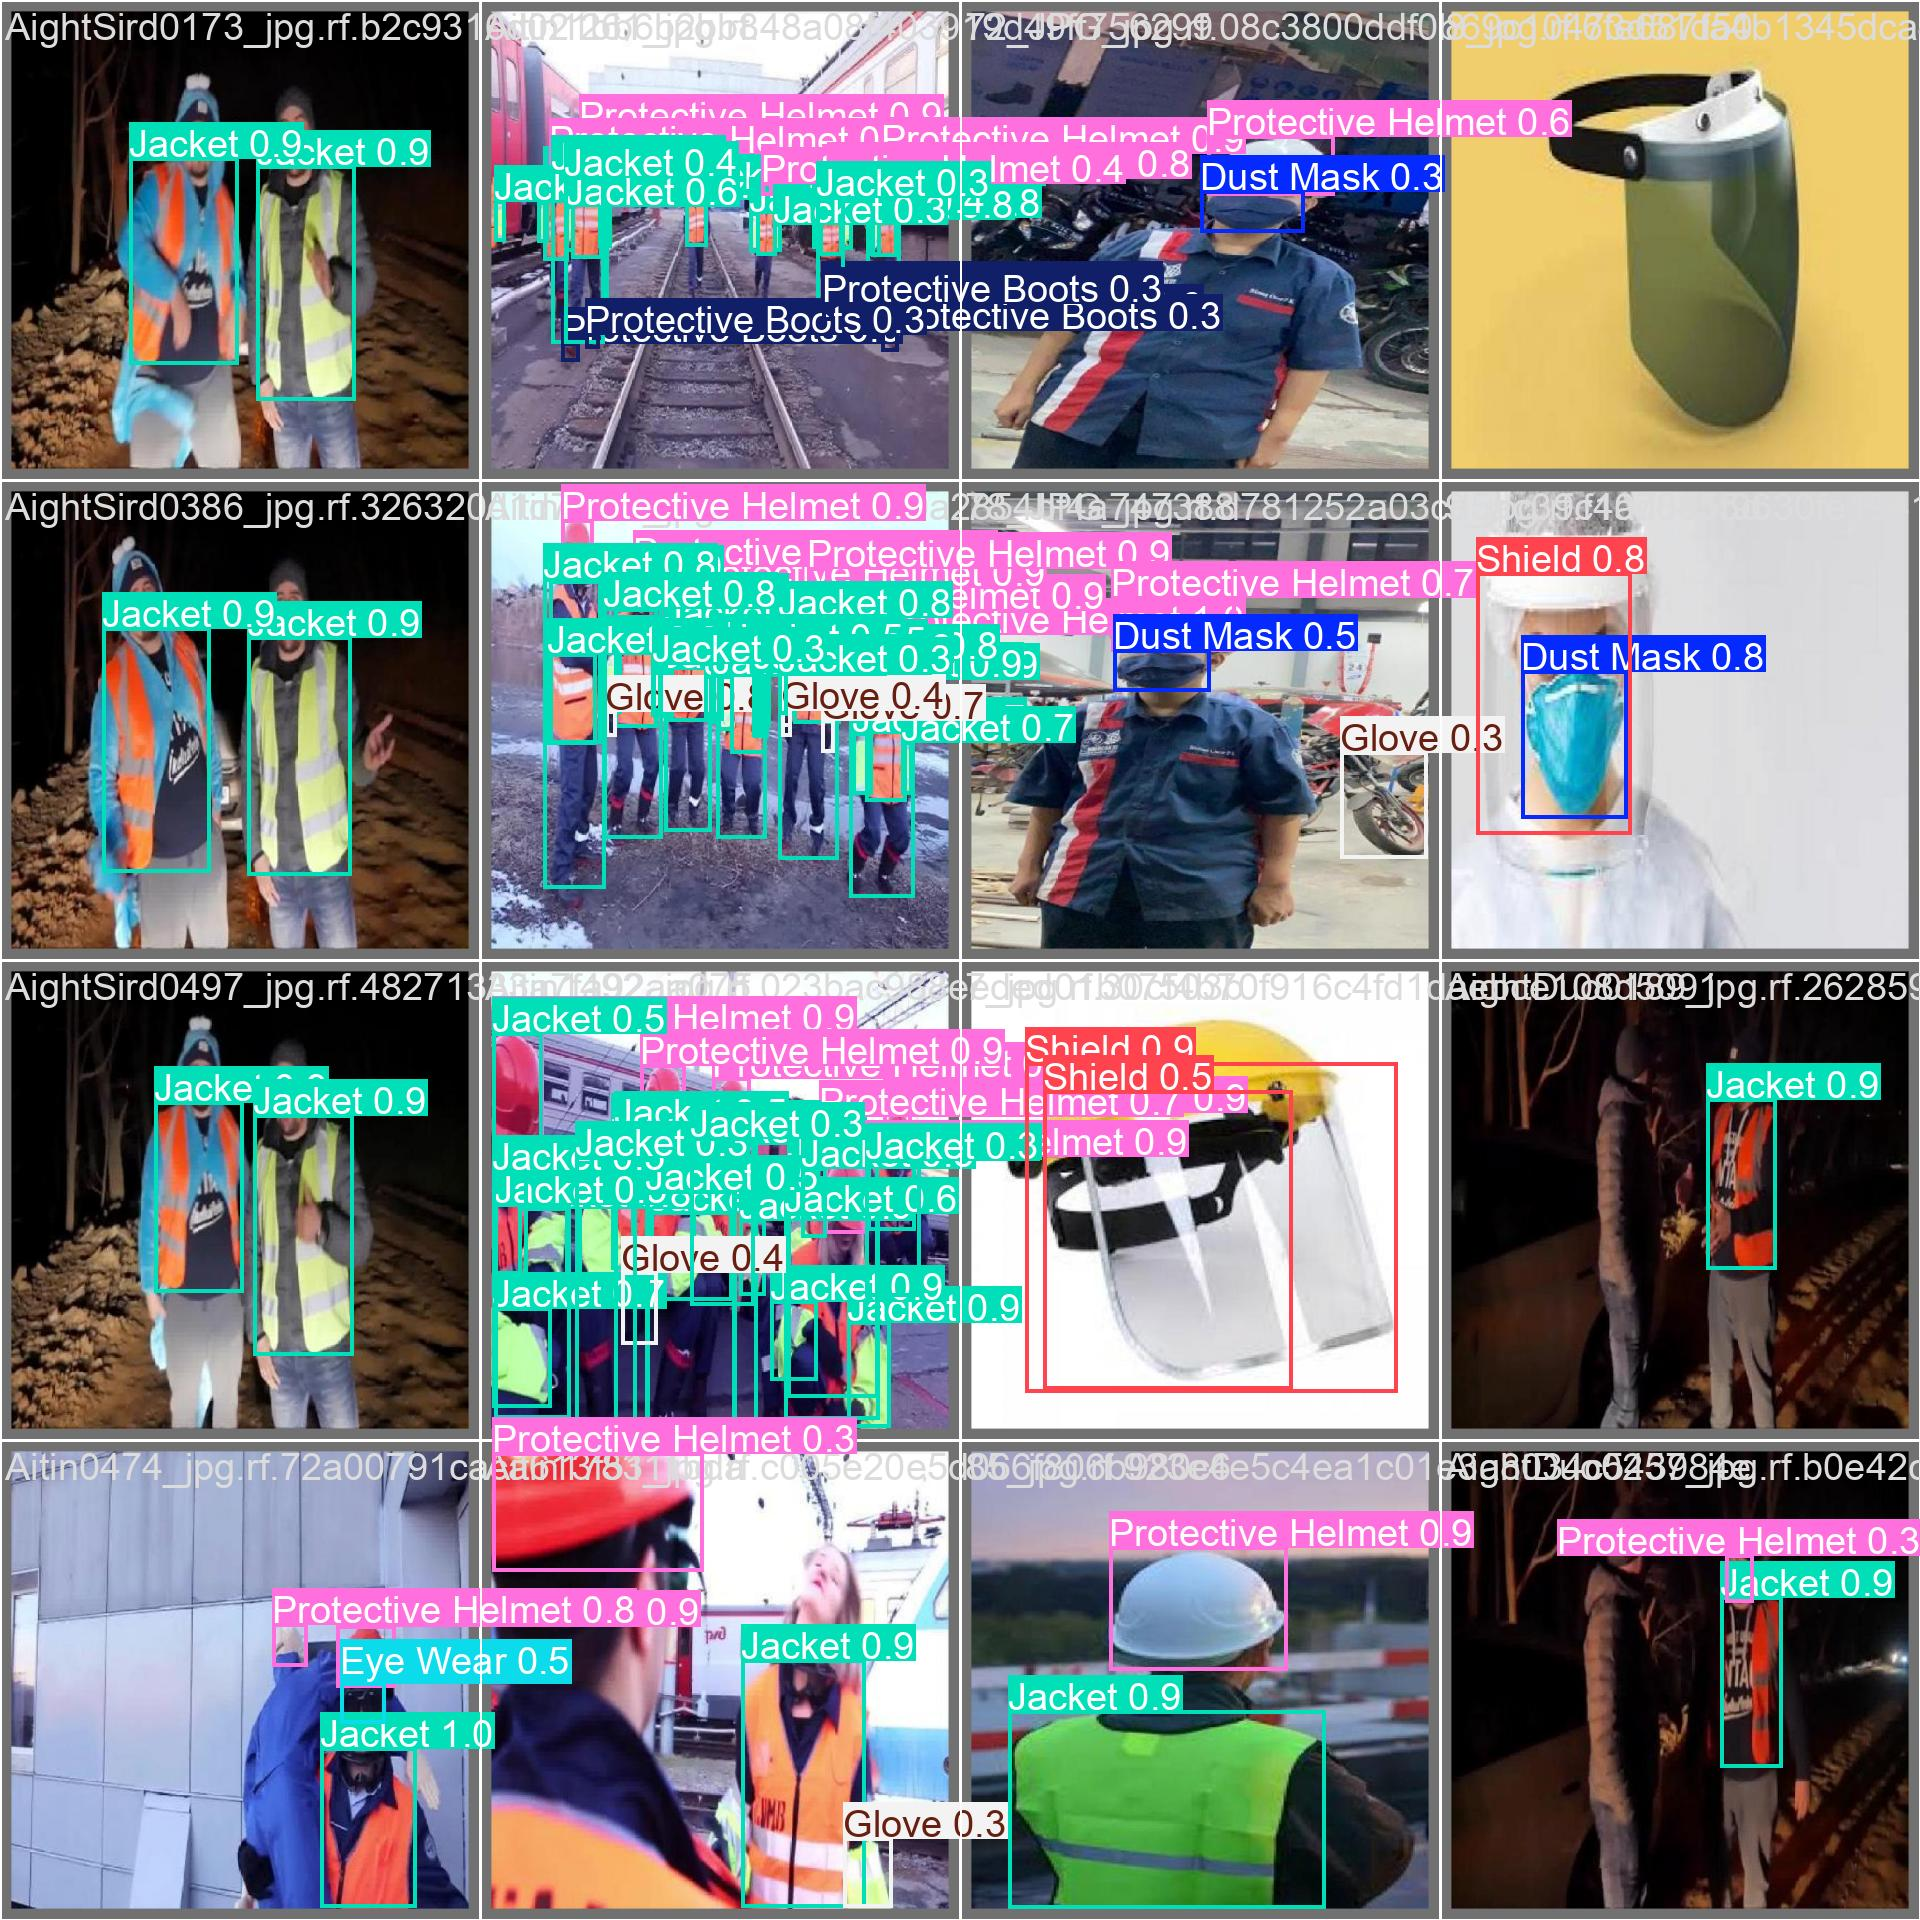

In [14]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [15]:
# Step # 07
# Validate Fine-Tuned Model
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2303.5±454.7 MB/s, size: 70.6 KB)
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:08<00:00,  4.75it/s]
                   all        649       3126       0.91      0.802      0.877      0.593
             Dust Mask        301        311      0.968      0.868      0.942      0.631
              Eye Wear        148        149      0.881      0.593      0.757      0.405
                 Glove        354        644      0.959      0.872      0.935      0.657
                Jacket        364        607      0.873      0.864      0.924      0.695
      Protective Boots        299        610      

In [16]:
# Step # 08 Inference with Custom Model on Images
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 2 Gloves, 1 Protective Helmet, 11.0ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 9.0ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Shield, 8.3ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Glove, 8.1ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Eye Wear, 8.2ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 2 Eye Wears, 8.4ms
image

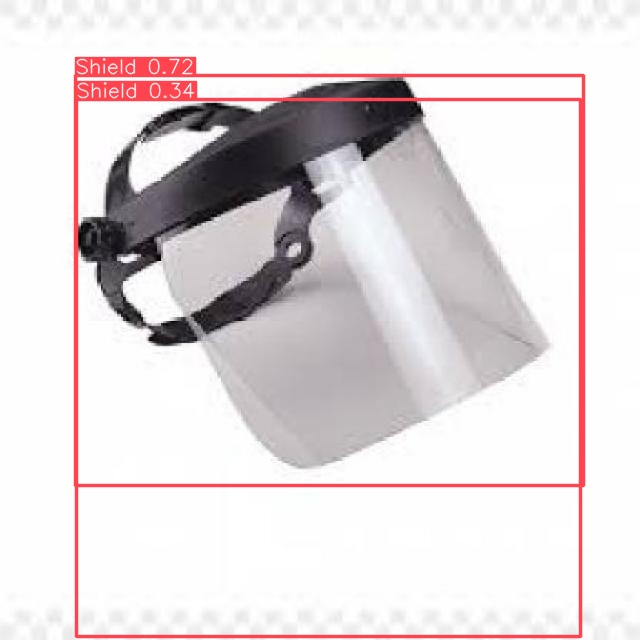

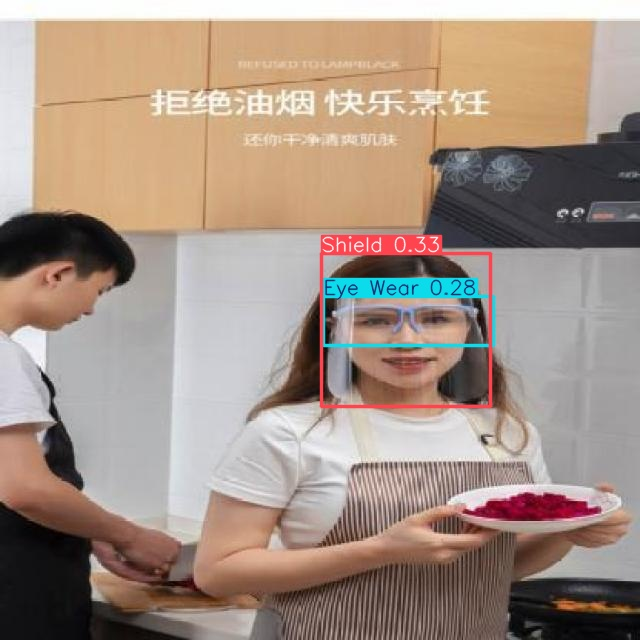

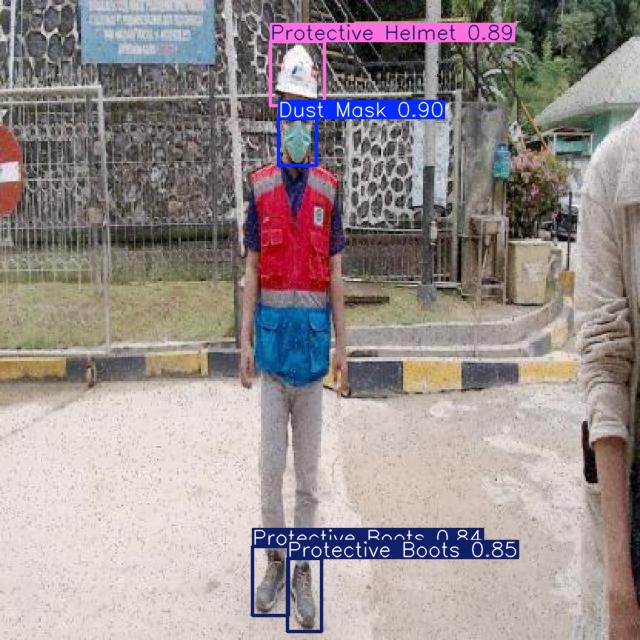

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [18]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 3.32MB/s]


In [19]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 7 Jackets, 6 Protective Bootss, 2 Protective Helmets, 11.7ms
Speed: 3.4ms preprocess, 11.7ms inference, 137.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


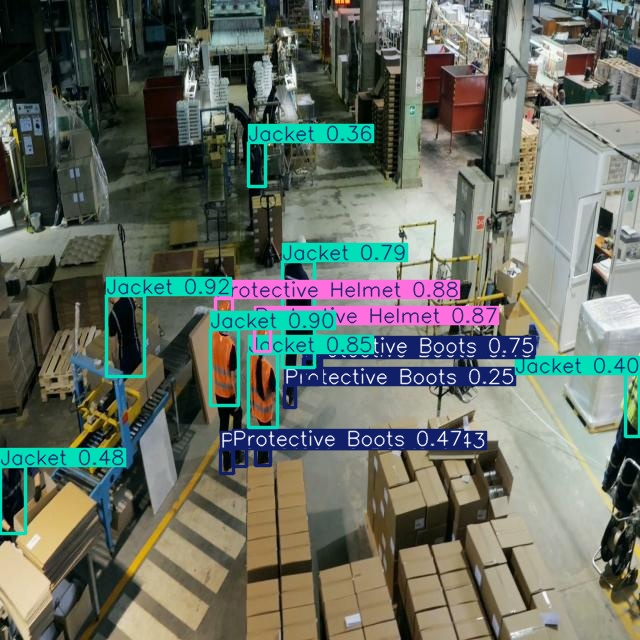

In [20]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)

In [21]:
# Step # 08
# Inference with Custom Model on Videos
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 68.5MB/s]


In [22]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 17.0MB/s]


In [23]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 1 Protective Helmet, 52.4ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 2 Protective Helmets, 13.2ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 8.8ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 11.4ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 12.4ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 1 Protective Helmet, 12.2ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 6 Jackets, 1 Protective Boots, 1 Protective Helmet, 13.1ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 1 Protective Boots, 1 Protective Helmet, 12.3ms
video 1/1 (frame 9/310) /conte

In [24]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Read and encode video
with open(compressed_path, 'rb') as f:
    mp4 = f.read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display video
HTML(f"""

""")


FileNotFoundError: [Errno 2] No such file or directory: '/content/result_compressed.mp4'